In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import keras.utils as image

path = "/content/drive/MyDrive/3D Conformer/Multi-Label Representation of Adverse Covid Drug Reactions.csv"
import csv
import pandas as pd
df = pd.read_csv(path)
df

,PubChem_ID,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,121304016,0,0,0,1,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
1,5743,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,1,1,0
2,3652,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,131411,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,6167,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,64927,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,44205240,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
7,132274054,0,0,0,0,0,0,0,1,1,...,0,1,0,0,1,1,0,0,1,0
8,134223875,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
9,135626798,0,0,0,0,0,1,0,1,1,...,0,0,0,0,1,1,0,1,1,0


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
df['PubChem_ID'] = df['PubChem_ID'].apply(str)
df_image = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('/content/drive/MyDrive/3D Conformer/Conformer/'+df['PubChem_ID'][i]+'.png',target_size=(128,128,3))
    img = image.img_to_array(img)
    img = img/255
    df_image.append(img)
X = np.array(df_image)

100%|██████████| 17/17 [00:00<00:00, 30.76it/s]


In [ ]:
y = np.array(df.drop(['PubChem_ID'],axis=1))
y.shape

(17, 29)

In [ ]:
X.shape

(17, 128, 128, 3)

In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2,MobileNet
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import (
    precision_score, recall_score, f1_score, cohen_kappa_score,
    roc_auc_score, confusion_matrix, hamming_loss
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Bidirectional, LSTM, Reshape, Dropout

def main_accuracy_score(y_test, y_pred):
    y_test = y_test.to_numpy()
    assert y_test.shape == y_pred.shape
    scores = [(np.sum(y_test[i] == y_pred[i]) / y_pred.shape[1]) for i in range(len(y_test))]
    return round(np.mean(scores), 4)

def create_cnn_blstm_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # Reduced filters
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0),  # Increased dropout rate
        Flatten(),
        Reshape((1, -1)),
        Bidirectional(LSTM(64)),  # Reduced units in LSTM
        Dense(num_classes, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

loo = LeaveOneOut()
num_classes = 29
model = create_cnn_blstm_model(num_classes)

y_predictedvalues, y_predictedvalues1, y_testedvalues = [], [], []
i = 1

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Introduce noise to the training data
    noise_factor = 0.05
    X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
    X_train_noisy = np.clip(X_train_noisy, 0., 1.)

    print(f"Training on Fold: {i}")
    i += 1

    model.fit(X_train_noisy, y_train, epochs=10, batch_size=32, verbose=1)  # Reduced epochs

    y_pred = model.predict(X_test)
    y_pred1 = (y_pred > 0.5).astype(int)

    y_predictedvalues.append(y_pred)
    y_predictedvalues1.append(y_pred1)
    y_testedvalues.append(y_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training on Fold: 1
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.0000e+00 - loss: 0.6948
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 0.5448
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 0.4232
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.3583
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.3307
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0625 - loss: 0.3119
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 0.2944
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 0.2811
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0625 - loss: 0.2712
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0625 - loss: 0.2636
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Training on Fold: 2
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.

In [ ]:
y_testedvalues

[array([[0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
         1, 1, 0, 1, 0, 1, 0]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
         0, 1, 0, 1, 1, 1, 0]]),
 array([[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 1, 0]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0]]),
 array([[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0]]),
 array([[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0]]),
 array([[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 1, 0]]),
 array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
         0, 1, 1, 0, 0, 1, 0]]),
 array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 1, 0]]),
 array([[0, 0, 0, 0, 0, 1, 0

In [ ]:
y_test = np.reshape(y_testedvalues, (17, 29))

print(y_test.shape)  # Check the shape of the 2D array

(17, 29)


In [ ]:
# Assuming y_testedvalues_original and y_predictedvalues_original
# hold the original lists before any reshaping

y_predictedvalues_flat = np.concatenate(y_predictedvalues)

# Convert predicted probabilities to binary predictions (0 or 1)
y_predictedvalues_flat_binary = np.where(y_predictedvalues_flat > 0.5, 1, 0)

print(classification_report(y_test, y_predictedvalues_flat_binary, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         2
           1     0.7500    0.7500    0.7500         4
           2     1.0000    1.0000    1.0000         1
           3     0.0000    0.0000    0.0000         1
           4     1.0000    1.0000    1.0000         1
           5     1.0000    0.5000    0.6667         2
           6     1.0000    1.0000    1.0000         1
           7     0.8750    0.8750    0.8750         8
           8     0.9167    1.0000    0.9565        11
           9     1.0000    0.8889    0.9412         9
          10     1.0000    1.0000    1.0000         3
          11     1.0000    0.7500    0.8571         4
          12     1.0000    1.0000    1.0000        10
          13     1.0000    1.0000    1.0000         3
          14     0.0000    0.0000    0.0000         2
          15     0.0000    0.0000    0.0000         1
          16     1.0000    1.0000    1.0000         2
          17     1.0000    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


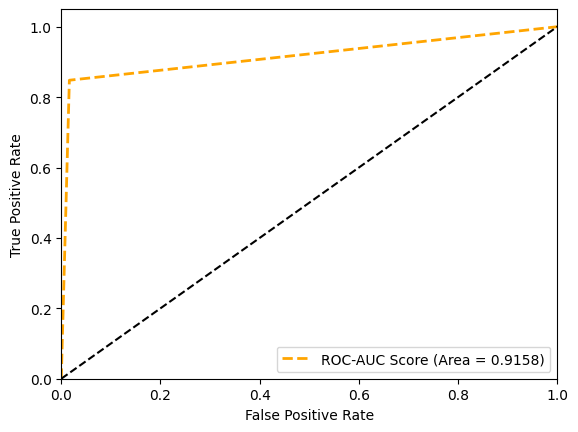

In [ ]:
n_classes = y.shape[1]
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy.interpolate import interp1d

y_testtest=y_test
yhat=y_predictedvalues_flat_binary

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_testtest[:, i], yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_testtest.ravel(), yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp1d(fpr[i], tpr[i])(all_fpr)

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='ROC-AUC Score (Area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='orange', linestyle='--', linewidth=2)



plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import seaborn as sns
def plot(conf_matrix, labels):
    plot_count = 1
    fig = plt.figure(figsize=(20, 60))
    for _ in range(len(labels)//5):
        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

import numpy as np
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

IndexError: list index out of range

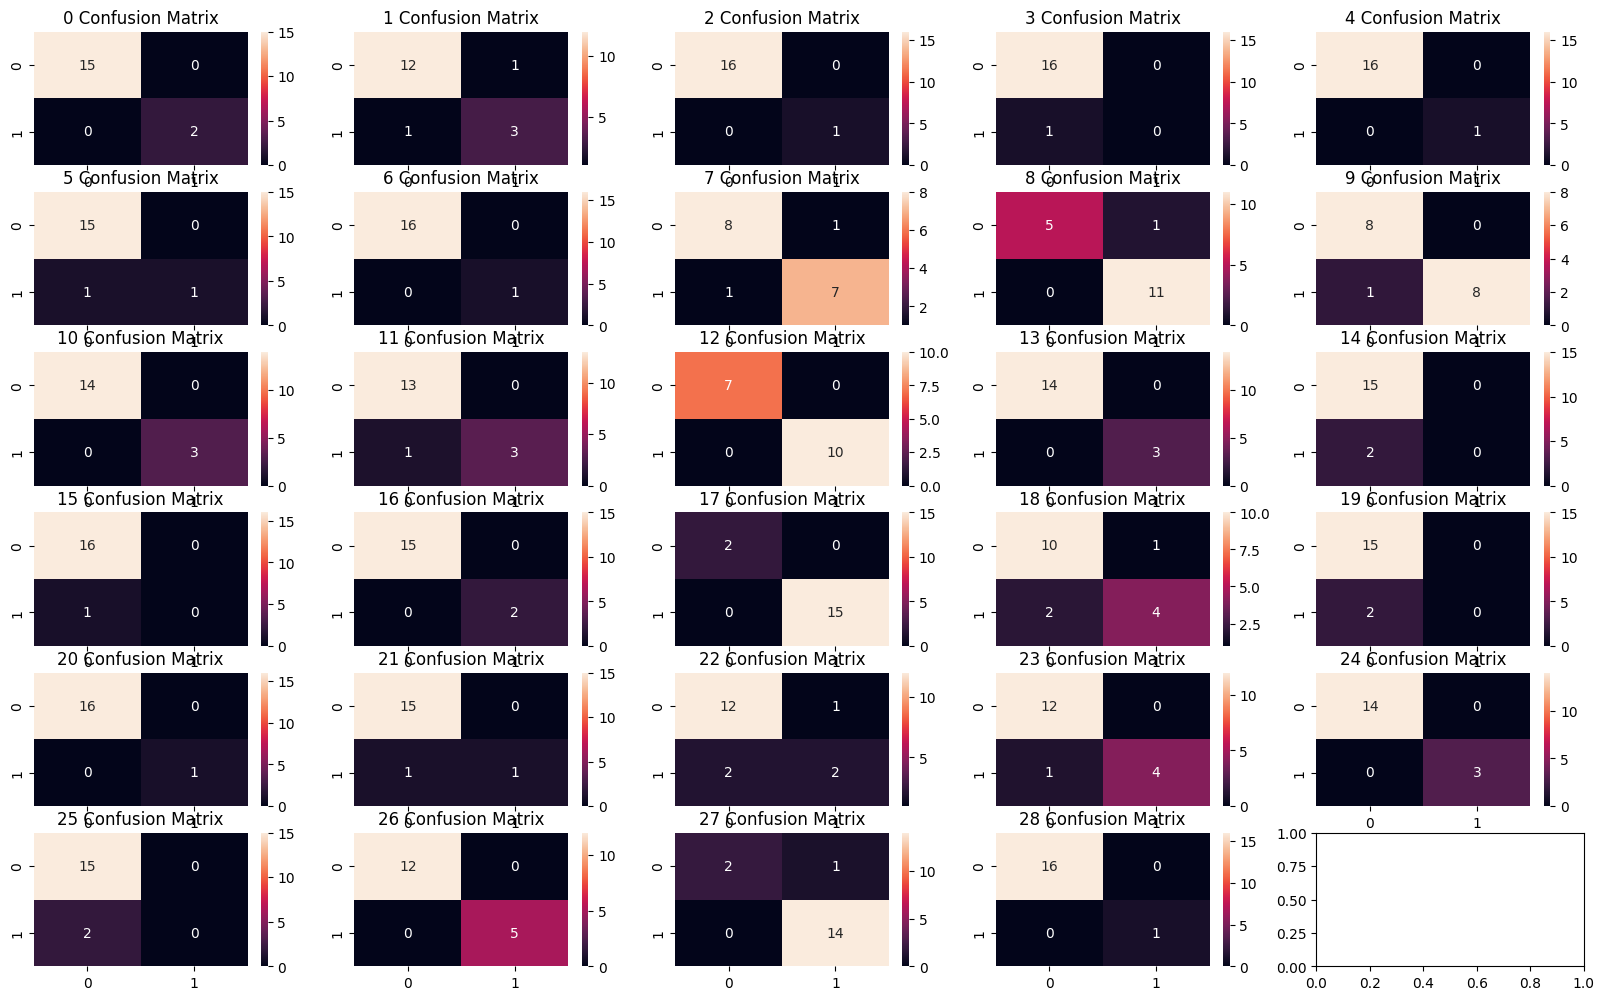

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix



y_true = y_testtest
y_pred = yhat

labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]

conf_mat_dict={}

for label_col in range(len(labels)):
    y_true_label = y_true[:, label_col]
    y_pred_label = y_pred[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)

plot(conf_mat_dict, labels)
plt.savefig('DT-CM-without-MLSMOTE.pdf')
#fig1.savefig('RF-cm-without-MLsmote.png', dpi=100)
# for label matrix in conf_mat_dict.items():
#     print("Confusion matrix for label {}:".format(label))
#     print(matrix)

In [ ]:
def main_accuracy_score(y_test, y_pred):
    y_test = y_test
    assert y_test.shape == y_pred.shape
    scores = [(np.sum(y_test[i] == y_pred[i]) / y_pred.shape[1]) for i in range(len(y_test))]
    return round(np.mean(scores), 5)

In [ ]:
print("accuracy",main_accuracy_score(y_true,y_pred))

accuracy 0.94929


In [ ]:
print("hamming loss", hamming_loss(y_true, y_pred))

hamming loss 0.05070993914807302


In [ ]:
print(classification_report(y_true,y_pred,digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000         2
           1    0.75000   0.75000   0.75000         4
           2    1.00000   1.00000   1.00000         1
           3    0.00000   0.00000   0.00000         1
           4    1.00000   1.00000   1.00000         1
           5    1.00000   0.50000   0.66667         2
           6    1.00000   1.00000   1.00000         1
           7    0.87500   0.87500   0.87500         8
           8    0.91667   1.00000   0.95652        11
           9    1.00000   0.88889   0.94118         9
          10    1.00000   1.00000   1.00000         3
          11    1.00000   0.75000   0.85714         4
          12    1.00000   1.00000   1.00000        10
          13    1.00000   1.00000   1.00000         3
          14    0.00000   0.00000   0.00000         2
          15    0.00000   0.00000   0.00000         1
          16    1.00000   1.00000   1.00000         2
          17    1.00000   1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
